In [1]:
import pandas as pd

In [8]:
train = pd.read_csv("../data/train.csv")


In [3]:
print(train.shape)
train.head(20)

(595212, 59)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


In [4]:
train["target"].value_counts(normalize=True)


target
0    0.963552
1    0.036448
Name: proportion, dtype: float64

In [5]:
# # Count null values for each column

missing = train.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

In [6]:
# check all the data types

bin_cols = [c for c in train.columns if "_bin" in c]
cat_cols = [c for c in train.columns if "_cat" in c]
cont_cols = [c for c in train.columns if c not in bin_cols + cat_cols + ["id", "target"]]

print("Binari:", len(bin_cols))
print("Categorici:", len(cat_cols))
print("Continui:", len(cont_cols))


Binari: 17
Categorici: 14
Continui: 26


No missing values

Feature mix bin/cat/cont

Dataset altamente sbilanciato

In [11]:
#. check the distribution of continuous variables

import matplotlib.pyplot as plt

# set stile
plt.style.use("seaborn-v0_8")

# numero di colonne continue
n_cont = len(cont_cols)

# set up griglia (5 colonne per riga)
fig, axes = plt.subplots(nrows=(n_cont // 5) + 1, ncols=5, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(cont_cols):
    train[col].hist(bins=30, ax=axes[i], color="steelblue", edgecolor="black")
    axes[i].set_title(col)

# rimuovi assi vuoti
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/lucat84/.pyenv/versions/3.11.3/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/lucat84/.pyenv/versions/3.11.3/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/lucat84/.pyenv/versions/3.11.3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [10]:
# correlazioni delle continue con il target
corr = train[cont_cols + ["target"]].corr()["target"].sort_values(ascending=False)
corr


target        1.000000
ps_car_13     0.053899
ps_car_12     0.038790
ps_reg_02     0.034800
ps_reg_03     0.030888
ps_car_15     0.027667
ps_reg_01     0.022888
ps_ind_01     0.018570
ps_ind_03     0.008360
ps_ind_14     0.007443
ps_calc_03    0.001907
ps_calc_01    0.001782
ps_calc_14    0.001362
ps_calc_02    0.001360
ps_calc_10    0.001061
ps_calc_05    0.000771
ps_calc_09    0.000719
ps_calc_11    0.000371
ps_calc_06    0.000082
ps_calc_04    0.000033
ps_calc_07   -0.000103
ps_calc_13   -0.000446
ps_calc_08   -0.001006
ps_calc_12   -0.001133
ps_car_11    -0.001213
ps_car_14    -0.004474
ps_ind_15    -0.021506
Name: target, dtype: float64

In [9]:
# Ricrea le liste dei tipi di variabili
bin_cols = [c for c in train.columns if "_bin" in c]
cat_cols = [c for c in train.columns if "_cat" in c]
cont_cols = [c for c in train.columns if c not in bin_cols + cat_cols + ["id", "target"]]


In [ ]:
for col in cat_cols:
    grouped = train.groupby(col)["target"].mean()
    print(f"\n{col} - Target mean per categoria:")
    print(grouped.sort_values(ascending=False))



ps_ind_02_cat - Target mean per categoria:
ps_ind_02_cat
-1    0.185185
 4    0.040780
 2    0.038139
 3    0.037217
 1    0.035725
Name: target, dtype: float64

ps_ind_04_cat - Target mean per categoria:
ps_ind_04_cat
-1    0.397590
 1    0.038644
 0    0.034790
Name: target, dtype: float64

ps_ind_05_cat - Target mean per categoria:
ps_ind_05_cat
-1    0.083319
 2    0.075526
 6    0.059336
 4    0.052061
 5    0.048514
 1    0.047825
 3    0.042998
 0    0.033865
Name: target, dtype: float64

ps_car_01_cat - Target mean per categoria:
ps_car_01_cat
-1     0.317757
 9     0.054421
 1     0.046818
 0     0.043869
 8     0.043398
 2     0.042910
 11    0.041581
 5     0.039246
 4     0.039161
 3     0.037549
 10    0.036976
 6     0.029763
 7     0.028770
Name: target, dtype: float64

ps_car_02_cat - Target mean per categoria:
ps_car_02_cat
 0    0.049507
 1    0.033772
-1    0.000000
Name: target, dtype: float64

ps_car_03_cat - Target mean per categoria:
ps_car_03_cat
 1    0.048298

In [ ]:
cat_risk_list = []

for col in cat_cols:
    grouped = train.groupby(col)["target"].mean().reset_index()
    grouped.columns = ["category", "claim_rate"]
    grouped["feature"] = col
    cat_risk_list.append(grouped)

# Combina tutti i dataframe
cat_risk_df = pd.concat(cat_risk_list, axis=0)

# Riorganizza le colonne
cat_risk_df = cat_risk_df[["feature", "category", "claim_rate"]]

# Ordina per rischio decrescente
cat_risk_df_sorted = cat_risk_df.sort_values(by="claim_rate", ascending=False).reset_index(drop=True)

cat_risk_df_sorted.head(10)


,feature,category,claim_rate
0,ps_ind_04_cat,-1,0.397590
1,ps_car_01_cat,-1,0.317757
2,ps_ind_02_cat,-1,0.185185
3,ps_car_04_cat,7,0.093525
4,ps_car_09_cat,-1,0.091388
5,ps_ind_05_cat,-1,0.083319
6,ps_car_07_cat,-1,0.078162
7,ps_ind_05_cat,2,0.075526
8,ps_car_11_cat,41,0.075110
9,ps_car_04_cat,5,0.071560


In [ ]:
for col in cat_cols:
    n_unique = train[col].nunique()
    print(f"{col}: {n_unique} categorie uniche")


ps_ind_02_cat: 5 categorie uniche
ps_ind_04_cat: 3 categorie uniche
ps_ind_05_cat: 8 categorie uniche
ps_car_01_cat: 13 categorie uniche
ps_car_02_cat: 3 categorie uniche
ps_car_03_cat: 3 categorie uniche
ps_car_04_cat: 10 categorie uniche
ps_car_05_cat: 3 categorie uniche
ps_car_06_cat: 18 categorie uniche
ps_car_07_cat: 3 categorie uniche
ps_car_08_cat: 2 categorie uniche
ps_car_09_cat: 6 categorie uniche
ps_car_10_cat: 3 categorie uniche
ps_car_11_cat: 104 categorie uniche


In [ ]:
train["target"].mean()


0.036447517859182946

In [ ]:
# Togliamo le categorie -1 (possibili missing)
cat_risk_no_minus1 = cat_risk_df_sorted[cat_risk_df_sorted["category"] != -1]

# Filtriamo solo quelle sopra la media del dataset (~0.036)
cat_risk_above_avg = cat_risk_no_minus1[cat_risk_no_minus1["claim_rate"] > 0.036]

# Mostriamo le top 10
cat_risk_above_avg.head(10)


,feature,category,claim_rate
3,ps_car_04_cat,7,0.093525
7,ps_ind_05_cat,2,0.075526
8,ps_car_11_cat,41,0.075110
9,ps_car_04_cat,5,0.071560
10,ps_car_06_cat,8,0.069405
11,ps_car_06_cat,5,0.067095
12,ps_car_11_cat,18,0.066504
13,ps_car_06_cat,2,0.065961
14,ps_car_06_cat,17,0.063830
15,ps_car_11_cat,75,0.063170


In [ ]:
# Lista delle feature binarie (se non l'hai già definita)
bin_cols = [col for col in train.columns if '_bin' in col]

# Calcolo del target mean per ciascuna categoria binaria (0 o 1)
for col in bin_cols:
    grouped = train.groupby(col)['target'].mean()
    print(f"\n{col} - Target mean per valore binario:")
    print(grouped.sort_values(ascending=False))



ps_ind_06_bin - Target mean per valore binario:
ps_ind_06_bin
0    0.041585
1    0.028537
Name: target, dtype: float64

ps_ind_07_bin - Target mean per valore binario:
ps_ind_07_bin
1    0.047350
0    0.032676
Name: target, dtype: float64

ps_ind_08_bin - Target mean per valore binario:
ps_ind_08_bin
1    0.042012
0    0.035357
Name: target, dtype: float64

ps_ind_09_bin - Target mean per valore binario:
ps_ind_09_bin
0    0.037184
1    0.033211
Name: target, dtype: float64

ps_ind_10_bin - Target mean per valore binario:
ps_ind_10_bin
1    0.054054
0    0.036441
Name: target, dtype: float64

ps_ind_11_bin - Target mean per valore binario:
ps_ind_11_bin
1    0.045680
0    0.036432
Name: target, dtype: float64

ps_ind_12_bin - Target mean per valore binario:
ps_ind_12_bin
1    0.051442
0    0.036305
Name: target, dtype: float64

ps_ind_13_bin - Target mean per valore binario:
ps_ind_13_bin
1    0.051418
0    0.036433
Name: target, dtype: float64

ps_ind_16_bin - Target mean per valore 

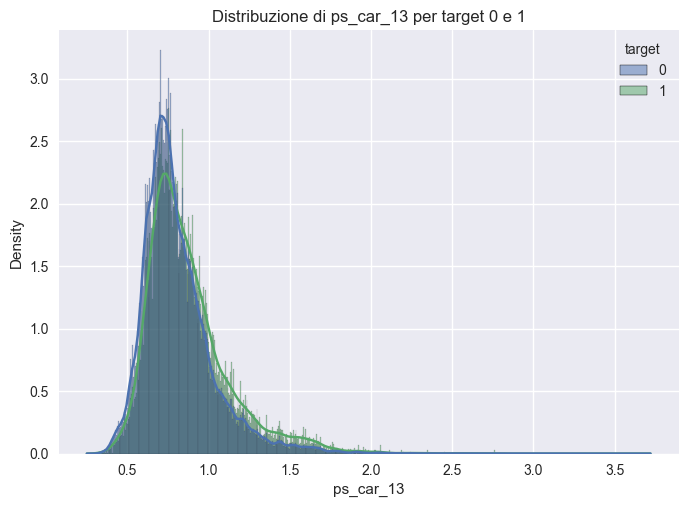

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

feature = "ps_car_13"

sns.histplot(data=train, x=feature, hue="target", kde=True, stat="density", common_norm=False)
plt.title(f"Distribuzione di {feature} per target 0 e 1")
plt.show()


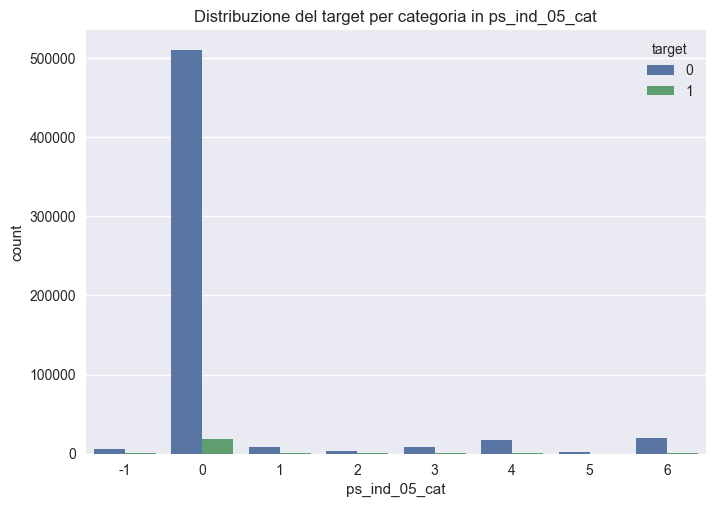

In [ ]:
cat_col = "ps_ind_05_cat"
sns.countplot(data=train, x=cat_col, hue="target")
plt.title(f"Distribuzione del target per categoria in {cat_col}")
plt.show()


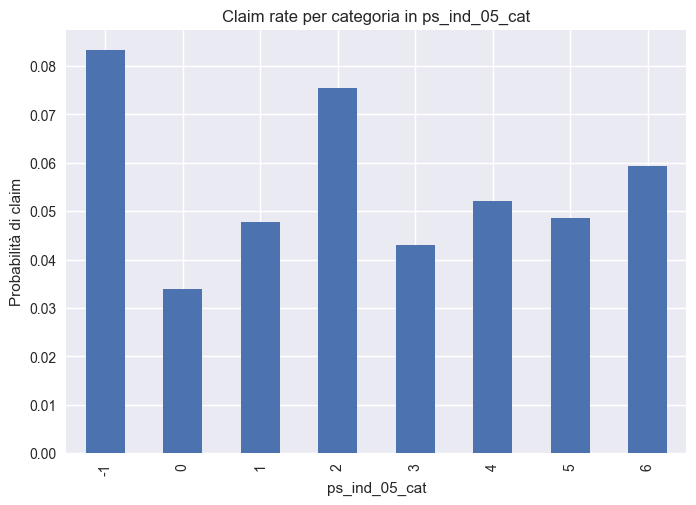

In [ ]:
col = "ps_ind_05_cat"
claim_rate = train.groupby(col)["target"].mean()
claim_rate.plot(kind="bar")
plt.title(f"Claim rate per categoria in {col}")
plt.ylabel("Probabilità di claim")
plt.show()


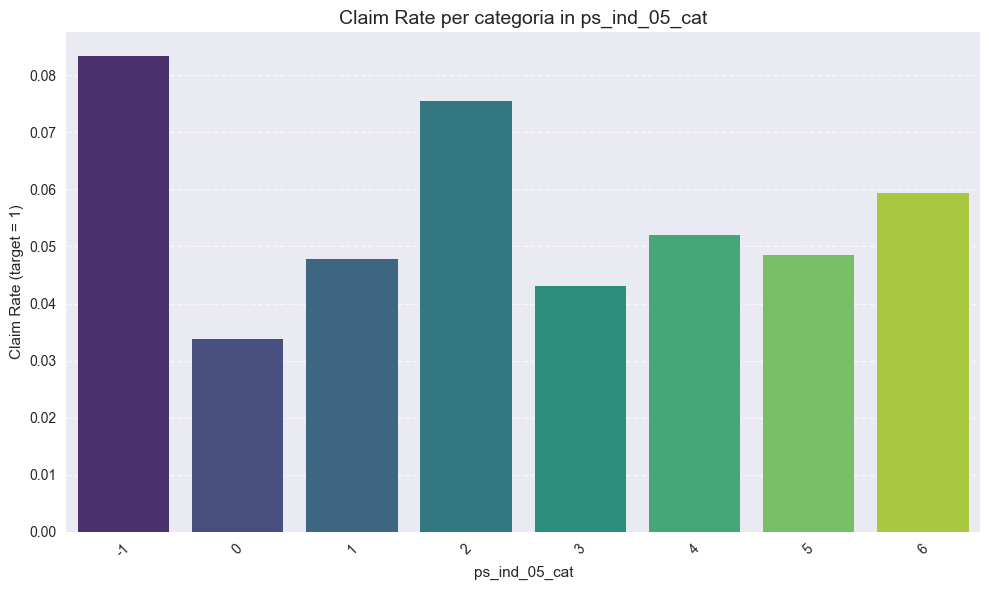

In [ ]:
# Bar plot of the claim rate (proportion of targets = 1) by category

import matplotlib.pyplot as plt
import seaborn as sns

# Scegli la feature categorica da analizzare
cat_feature = 'ps_ind_05_cat'

# Calcola il claim rate per ogni categoria
claim_rate = train.groupby(cat_feature)['target'].mean().reset_index()
claim_rate.columns = [cat_feature, 'claim_rate']

# Ordina per claim rate decrescente (opzionale)
claim_rate = claim_rate.sort_values(by='claim_rate', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=claim_rate, x=cat_feature, y='claim_rate', palette='viridis')

plt.title(f'Claim Rate per categoria in {cat_feature}', fontsize=14)
plt.xlabel(cat_feature)
plt.ylabel('Claim Rate (target = 1)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Build a heuristic baseline model excluding -1
→ based on "real" categories with claim rates ≥ 7–10%

In [ ]:
# If the customer has certain high-risk categories → we predict that they will make a claim.

def simple_heuristic_model(row):
    if (
        (row['ps_car_04_cat'] == 7) or
        (row['ps_ind_05_cat'] == 2) or
        (row['ps_car_11_cat'] == 41) or
        (row['ps_car_06_cat'] == 8) or
        (row['ps_car_06_cat'] == 2)
    ):
        return 1
    return 0


In [ ]:
# Applichiamo la funzione su ogni riga
train['heuristic_pred'] = train.apply(simple_heuristic_model, axis=1)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_true = train['target']
y_pred = train['heuristic_pred']

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Solo se vuoi anche la ROC-AUC
print("\nROC-AUC Score:", roc_auc_score(y_true, y_pred))


Confusion Matrix:
[[563819   9699]
 [ 20927    767]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9642    0.9831    0.9736    573518
           1     0.0733    0.0354    0.0477     21694

    accuracy                         0.9485    595212
   macro avg     0.5187    0.5092    0.5106    595212
weighted avg     0.9317    0.9485    0.9398    595212


ROC-AUC Score: 0.5092219921945018


 # Building a logidti regrassion model using all the variables

In [ ]:
# Ignoriamo id e target
exclude_cols = ['id', 'target']

# Colonne binarie (usabili direttamente)
bin_cols = [col for col in train.columns if '_bin' in col]

# Colonne categoriche (da one-hot encode)
cat_cols = [col for col in train.columns if '_cat' in col]

# Colonne continue (da scalare)
num_cols = [col for col in train.columns if col not in bin_cols + cat_cols + exclude_cols]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Istanzio lo scaler
scaler = StandardScaler()

# Applico fit + transform SOLO alle numeriche
X_num_scaled = scaler.fit_transform(train[num_cols])


In [ ]:
# One-hot encoding delle categoriche (evitiamo la dummy trap rimuovendo il primo livello)
X_cat_encoded = pd.get_dummies(train[cat_cols], drop_first=True)


In [ ]:
import numpy as np
import pandas as pd

# Riconvertiamo l'array numpy scalato in dataframe, con i nomi originali
X_num_df = pd.DataFrame(X_num_scaled, columns=num_cols, index=train.index)

# Concatenazione: numeriche + categoriche + binarie
X_final = pd.concat([X_num_df, X_cat_encoded, train[bin_cols]], axis=1)

# Target
y = train['target']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Suddividiamo in training e test set
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

# Inizializziamo il modello
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')  # liblinear è robusto per dataset sbilanciati

# Addestriamo il modello
log_reg.fit(X_train, y_train)

# Previsioni
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]  # probabilità che sia classe 1

# Valutazione
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
[[114704      0]
 [  4339      0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114704
           1       0.00      0.00      0.00      4339

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043


ROC-AUC Score: 0.6223726295430079


/Users/lucat84/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucat84/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucat84/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [ ]:
# KNN k=5 with only numerical features

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Carica il dataset dal path corretto
train = pd.read_csv("../data/train.csv")

# Separa target e feature
y = train['target']
X = train.drop(columns=['id', 'target'])

# Seleziona solo le colonne numeriche (in questo dataset sono tutte float64)
X_numerical = X.select_dtypes(include=['float64', 'int64'])

# Suddividi in training e test set con stratificazione
X_train, X_test, y_train, y_test = train_test_split(
    X_numerical, y, test_size=0.2, random_state=42, stratify=y)

# Applica lo scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inizializza e addestra KNN con k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Fai le predizioni
y_pred = knn.predict(X_test_scaled)
y_proba = knn.predict_proba(X_test_scaled)[:, 1]

# Valuta le performance
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"\n🎯 ROC-AUC Score: {roc_auc:.4f}")


📊 Confusion Matrix:
[[114635     69]
 [  4332      7]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114704
           1       0.09      0.00      0.00      4339

    accuracy                           0.96    119043
   macro avg       0.53      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043


🎯 ROC-AUC Score: 0.5127


#Optimising k for KNN using ROC-AUC

We use the dataset with only scaled numerical features (as in the previous test).

We use K-Fold Cross-Validation (e.g. 5-fold).

For each value of k, we calculate the average ROC-AUC.

We plot the results in a graph to choose the best k.

In [ ]:
!pip install imbalanced-learn


  Using cached numpy-2.3.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached scikit_learn-1.7.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
Using cached numpy-2.3.2-cp311-cp311-macosx_14_0_arm64.whl (5.4 MB)
Using cached scikit_learn-1.7.1-cp311-cp311-macosx_12_0_arm64.whl (8.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: scikit-learn━━━━━━━━━━━━ 0/3 [numpy]
    Found existing installation: scikit-learn 1.2.232m0/3 [numpy]
    Uninstalling scikit-learn-1.2.2:━━━━━━━━ 0/3 [numpy]
      Successfully uninstalled scikit-learn-1.2.20/3 [numpy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [imbalanced-learn][imbalanced-learn]


In [ ]:
!pip install -U scikit-learn



In [ ]:
pip install imbalanced-learn==0.11.0


  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.14.0
    Uninstalling imbalanced-learn-0.14.0:
      Successfully uninstalled imbalanced-learn-0.14.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#KNN k=5 + SMOTE

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# 1. Carica il dataset
train = pd.read_csv("../data/train.csv")

# 2. Seleziona le variabili numeriche (escludi binarie, categoriche, target)
num_features = train.select_dtypes(include=["float64", "int64"]).columns
num_features = [f for f in num_features if "bin" not in f and "cat" not in f and f != "target"]

X = train[num_features]
y = train["target"]

# 3. Gestisci i valori mancanti (-1 trattato come NaN → mediana)
X = X.replace(-1, np.nan)
X = X.fillna(X.median())

# 4. Scala i dati numerici
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Applica SMOTE per oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 6. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# 7. KNN classifier con k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 8. Predizioni e valutazione
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"\n🎯 ROC-AUC Score: {roc_auc:.4f}")




ImportError: cannot import name 'UnsetMetadataPassedError' from 'sklearn.exceptions' (/Users/lucat84/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/exceptions.py)